# Exercício 01: busca A*
### aplicada ao problema de ir até Bucareste a partir de Arad usando a heurística de distância em linha reta:
Nome: Aritana Noara Costa Santos
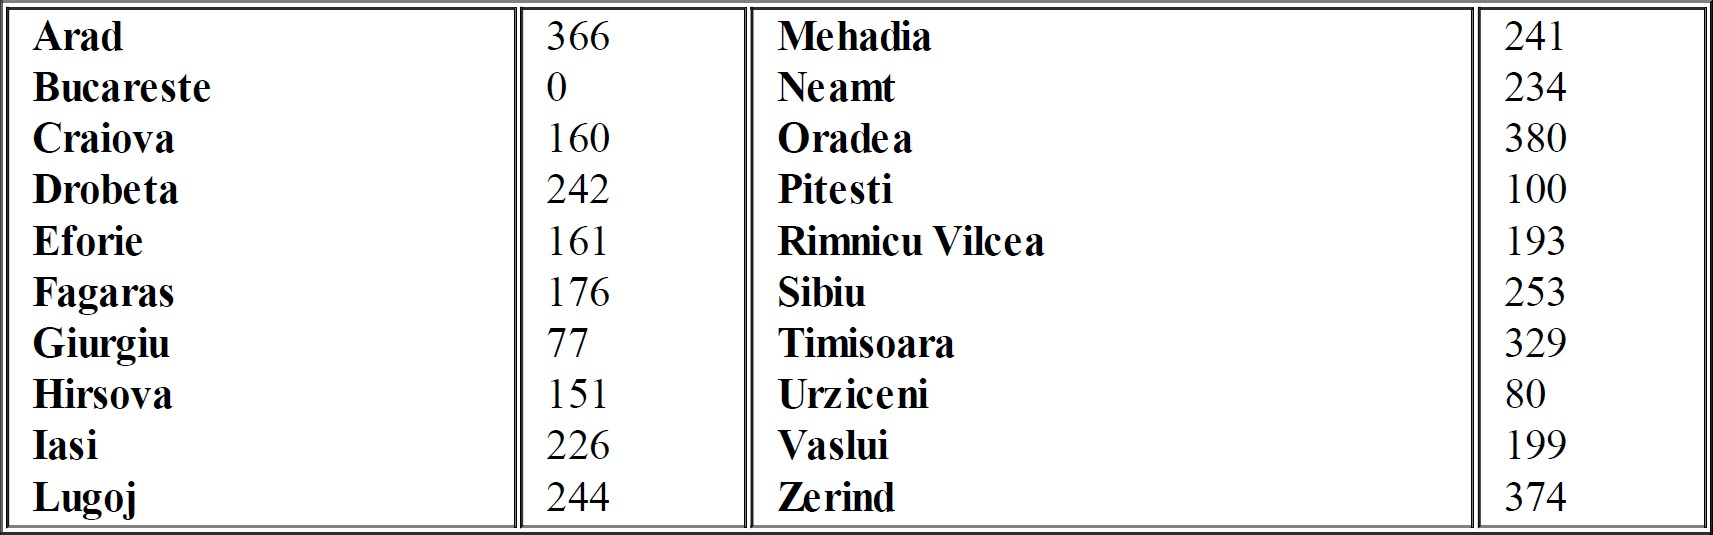

# Matriz de adjacência
Para mapearmos as distâncias entre as cidades do mapa.:
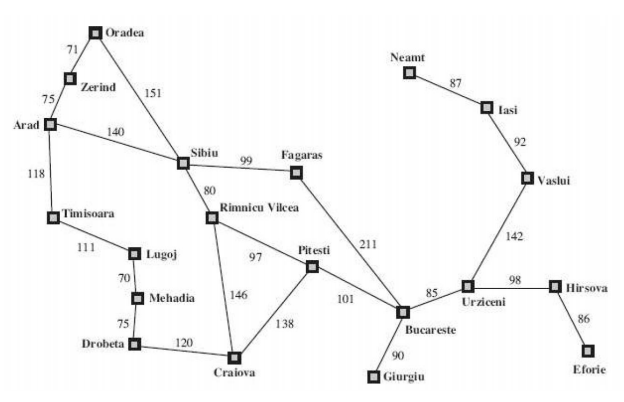


### Executemos a matriz de adjacência abaixo:

In [321]:
class Matriz_Adjacência:
    def __init__(self,vertices):
        self.vertices =  vertices
        self.grafo = [[-1]*self.vertices for i in range(self.vertices)]
    
    def adiciona_aresta(self, linha, coluna,valor):
        self.grafo[linha-1][coluna-1] = valor
    
    def mostra_matriz(self):
        print('A matriz de adjacência é:')
        for i in range(self.vertices):
            print(self.grafo[i])
    
    def pega_valor_celula(self, linha, coluna):
        return self.grafo[linha][coluna]

        

g = Matriz_Adjacência(20)

#CidadesVizinhas-Arad
g.adiciona_aresta(1,16,140)
g.adiciona_aresta(1,17,118)
g.adiciona_aresta(1,20,75)


#CidadesVizinhas-Bucarest
g.adiciona_aresta(2,7,90)
g.adiciona_aresta(2,18,85)

#CidadesVizinhas-Craiova
g.adiciona_aresta(3,14,138)

#CidadesVizinhas-Drobeta
g.adiciona_aresta(4,3,120)

#CidadesVizinhas-Eforie

#CidadesVizinhas-Fagaras
g.adiciona_aresta(6,2,211)

#CidadesVizinhas-Giurgiu

#CidadesVizinhas-Hirsova
g.adiciona_aresta(8,5,86)

#CidadesVizinhas-Iasi
g.adiciona_aresta(9,12,87)

#CidadesVizinhas-Lugoj
g.adiciona_aresta(10,11,70)

#CidadesVizinhas-Mehadia
g.adiciona_aresta(11,4,75)

#CidadesVizinhas-Neamt

#CidadesVizinhas-Oradea
g.adiciona_aresta(13,16,151)

#CidadesVizinhas-Pitesti
g.adiciona_aresta(14,2,101)

#CidadesVizinhas-Rimnicu Vilcea
g.adiciona_aresta(15,3,146)
g.adiciona_aresta(15,14,97)

#CidadesVizinhas-Sibiu
g.adiciona_aresta(16,6,99)
g.adiciona_aresta(16,15,80)

#CidadesVizinhas-Timisoara
g.adiciona_aresta(17,10,111)

#CidadesVizinhas-Urziceni
g.adiciona_aresta(18,8,98)
g.adiciona_aresta(18,19,142)

#CidadesVizinhas-Vaslui
g.adiciona_aresta(19,9,92)

#CidadesVizinhas-Zerind
g.adiciona_aresta(20,13,71)

g.mostra_matriz()





        

A matriz de adjacência é:
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 140, 118, -1, -1, 75]
[-1, -1, -1, -1, -1, -1, 90, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 85, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 138, -1, -1, -1, -1, -1, -1]
[-1, -1, 120, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, 211, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, 86, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 87, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 70, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, 75, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

### Executemos as definições de classe e funções abaixo:

In [322]:
class Cidade:
    def __init__(self,nome,custoHeuristico,numero):
        self.nome = nome
        self.custoHeuristico = custoHeuristico
        self.funcaoAvaliacao = None
        self.cidadeAnterior = None
        self.cidadesAdjacentesLista = []
        self.visitada = None
        self.objetivo = None
        self.numero = numero
        
    def __repr__(self):
         return '%s:\
         \n\tNumero: %s\
         \n\tCusto_Heuristico: %s\
         \n\tFuncao_Avaliacao: %s\
         \n\tCidade_Anterior: %s\
         \n\tCidades_Adjacentes à frente: %s\
         \n\tVisitada?: %s\
         \n\tObjetivo?: %s\n'%(self.nome,self.numero,self.custoHeuristico,self.funcaoAvaliacao,self.cidadeAnterior,\
           self.cidadesAdjacentesLista,self.visitada,self.objetivo)  
        
       
        #\n\tCidadeAnterior: %s\
        #\n\tVisitada: %s\
       # \n\tObjetivo: %s\n'
       # %(self.nome,self.custoHeuristico,self.funcaoAvaliacao,self.cidadeAnterior,visitada,objetivo) 
          
        
    def atualizaFuncaoAvaliacao(self,custoChegadaAteEstaCidade):
        self.funcaoAvaliacao =  self.custoHeuristico + custoChegadaAteEstaCidade
        return self.funcaoAvaliacao
    
    def insereCidadeAdjacente(self,cidade):
        self.cidadesAdjacentesLista.append(cidade)
        
    def insereCidadeAnterior(self,cidade):
        self.cidadeAnterior = cidade   
        
    def pegarListaCidadesAdjacentes(self):
        return self.cidadesAdjacentesLista
        
    def pegarNomeCidade(self):
        return self.nome
    
    def pegarFuncaoAvaliacao(self):
        return self.funcaoAvaliacao
    
    def verificarSeObjetivo(self):
        return self.objetivo  
    
    def marcarVisita(self):
         self.visitada = 1 
            
    def verificarVisita(self):
         return self.visitada 

    def pegarNumero(self):
         return self.numero        

def verificarMenorFuncaoAvaliacao(fila): #Funcao para pegar a menor funcao de avaliacao da fila
    menorFuncaoAvaliacao = fila[0].pegarFuncaoAvaliacao()    
    cidadeEscolhida = fila[0]
    for cidade in fila:           
        funcaoAvaliacao = cidade.pegarFuncaoAvaliacao()
        if menorFuncaoAvaliacao > funcaoAvaliacao:
            menorFuncaoAvaliacao = funcaoAvaliacao
            cidadeEscolhida = cidade
    return cidadeEscolhida

def gerarListaCidadesAdjacentes(ListaNomeCidadesAdjacentes,cidades) :
    for nome in ListaNomeCidadesAdjacentes:
        for cidade in cidades:
            if cidade.pegarNomeCidade()==nome:
                cidade.insereCidadeAnterior(cidadeVisitada.pegarNomeCidade())
                listaCidadesAdjacentes.append(copy.copy(cidade))
    return listaCidadesAdjacentes


def inserirCidadesAdjacentesNaFilaDeAvaliacao(filaAvaliacao,listaCidadesAdjacentes):
    for cidade in listaCidadesAdjacentes:
        filaAvaliacao.append(cidade)
    return filaAvaliacao

def verificarPosicaoNaLista(lista,cidadeAlvo):
    i = 0
    for cidade in lista:
        if cidade.pegarNumero() == cidadeAlvo.pegarNumero(): 
            return i
        i = i+1
    return None
        
def removerCidadesVisitadasNaFilaDeAvaliacao(filaAvaliacao,numero):
    filaAvaliacao.pop(numero)
    return filaAvaliacao

def atualizarFuncaoObjetivoCidade(listaCidadesAdjacentes,cidadeVisitada):
    i = 0
    numeroCidadeVisitada = cidadeVisitada.pegarNumero()
    for cidade in listaCidadesAdjacentes:
        numeroDaCidadeProxima = cidade.pegarNumero()
        distanciaEntreCidades = g.pega_valor_celula(numeroCidadeVisitada,numeroDaCidadeProxima)
        listaCidadesAdjacentes[i].atualizaFuncaoAvaliacao(distanciaEntreCidades)
        i = i+1
    return listaCidadesAdjacentes


### Por fim Executemos o programa principal abaixo:

In [325]:
import copy

vetorHeuristicaCidade = [366, 0, 160, 242, 161, 176, 77, 151, 226, 244, 241, 234, 380, 100, 193, 253, 329, 80, 199, 374]
vetorNomeCidades = ["Arad","Bucarest","Craiova","Drobeta","Eforie","Fagaras","Giurgiu","Hirsova","Iasi","Lugoj","Mehadia","Neamt","Oradea","Pitesti","Rimnicu Vilcea","Sibiu","Timisoara","Urziceni","Vaslui","Zerind"]

cidades = [] #vetor com as cidades 
filaAvaliacao = []

i = 0
for nomeCidade in vetorNomeCidades:  #criando vetor de cidades
    cidades.append(Cidade(nomeCidade,vetorHeuristicaCidade[i],i))
    i = i + 1 
    
cidades[1].objetivo=1 # Setar Cidade objetivo: Bucarest
    
#para cada cidade na lista, preencher lista de cidade adjacentes
for i in range(20):#percorre vetorCidades
    for j in range(20):#percorre uma linha da matriz adjacências   
        adjacencia = g.pega_valor_celula(i,j)
        if adjacencia != -1:
            cidades[i].insereCidadeAdjacente(vetorNomeCidades[j])  
            


cidades[0].atualizaFuncaoAvaliacao(0)# Partir de Arad    
filaAvaliacao.append(cidades[0]) #Colocar Arad na fila de avaliacao 
filaCidadesRemovidas = []

j = 0
while 1: #percorrer cidades por busca A* até encontrar Bucarest 
    listaCidadesAdjacentes=[] #lista com todas cidades adjacentes num dado momento
    
    cidadeVisitada = verificarMenorFuncaoAvaliacao(filaAvaliacao) #avalia menor cidade 
    cidadeVisitada.marcarVisita()
    
    numeroCidadeParaRemover =  verificarPosicaoNaLista(filaAvaliacao,cidadeVisitada)
    filaCidadesRemovidas.append(cidadeVisitada)#registra cidade visitada
    #remove cidade visitada da fila
    filaAvaliacao = removerCidadesVisitadasNaFilaDeAvaliacao(filaAvaliacao, numeroCidadeParaRemover)
    
    print("Cidade Visitada: \n %s"%(cidadeVisitada))
    
    if cidadeVisitada.verificarSeObjetivo()==1:#verifica se é objetivo 
        print("Encontrou a cidade objetivo!") 
        break  
    #gerar lista de cidade adjacentes    
    ListaNomeCidadesAdjacentes = cidadeVisitada.pegarListaCidadesAdjacentes()
    listaCidadesAdjacentes = gerarListaCidadesAdjacentes(ListaNomeCidadesAdjacentes,cidades)
    listaCidadesAdjacentes = atualizarFuncaoObjetivoCidade(listaCidadesAdjacentes,cidadeVisitada) 
    filaAvaliacao = inserirCidadesAdjacentesNaFilaDeAvaliacao(filaAvaliacao,listaCidadesAdjacentes)    

    print("-------------------interacao %s-------------------"%(j))
    j = j+1      
















Cidade Visitada: 
 Arad:         
	Numero: 0         
	Custo_Heuristico: 366         
	Funcao_Avaliacao: 366         
	Cidade_Anterior: None         
	Cidades_Adjacentes à frente: ['Sibiu', 'Timisoara', 'Zerind']         
	Visitada?: 1         
	Objetivo?: None

-------------------interacao 0-------------------
Cidade Visitada: 
 Sibiu:         
	Numero: 15         
	Custo_Heuristico: 253         
	Funcao_Avaliacao: 393         
	Cidade_Anterior: Arad         
	Cidades_Adjacentes à frente: ['Fagaras', 'Rimnicu Vilcea']         
	Visitada?: 1         
	Objetivo?: None

-------------------interacao 1-------------------
Cidade Visitada: 
 Rimnicu Vilcea:         
	Numero: 14         
	Custo_Heuristico: 193         
	Funcao_Avaliacao: 273         
	Cidade_Anterior: Sibiu         
	Cidades_Adjacentes à frente: ['Craiova', 'Pitesti']         
	Visitada?: 1         
	Objetivo?: None

-------------------interacao 2-------------------
Cidade Visitada: 
 Pitesti:         
	Numero: 13         
	C